# **The Airbnb Case Study** 🏡✨
<img src="airbnb-logo-png_seeklogo-284907.png" width="100" height="100">

Welcome to the world of Airbnb data exploration! 🌍 Whether you’re a host trying to optimize your listings or a curious traveler, this analysis will uncover fascinating insights about Airbnb properties, pricing, availability, and guest behavior.

- What’s in store? 🚀
We’ll be diving into:

Exploring Airbnb data 🏙️:

- **Discover trends in room types, neighborhoods, pricing, and availability.**
Answer questions like: Where are the most available properties? What drives reviews? and How do hosts manage multiple listings?
Data Visualization Magic 📊✨:

- **Transform raw numbers into beautiful insights using heatmaps, scatterplots, bar charts, and more.**
Visual stories that highlight correlations, trends, and actionable opportunities.
Data Science Meets Real Estate 🧠💡:

- **Correlation deep dives: Do prices influence reviews? Does availability vary by location?**
Categories explored: Neighborhood Groups, Room Types, Host Listings, and Guest Preferences.


### About the variables:
id: Unique identifier for each listing.

name: Name of the listing (e.g., title provided by the host).

host_id: Unique identifier for each host.

host_name: Name of the host.

neighbourhood_group: The broader geographical group or area (e.g., borough or city region).

neighbourhood: The specific area or neighborhood where the listing is located.

latitude: Geographical latitude of the property location.

longitude: Geographical longitude of the property location.

room_type: Type of accommodation offered (e.g., Entire home, Private room).

price: Price per night in the given currency.

minimum_nights: Minimum number of nights required for a stay.

number_of_reviews: Total number of reviews received for the listing.

last_review: Date of the most recent review (nullable field).

reviews_per_month: Average number of reviews per month (nullable field).

calculated_host_listings_count: Number of listings associated with the host.

availability_365: Number of days the property is available for booking in a year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Airbnb_data.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# EDA

In [5]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Insights

1. Dataset have int64, object, float64 datatype values
2. Dataset have some null values.
3. Column "last_review" has data in Date format and also it has null values which will be not possible to fill with any other data. So we will drop this column.

### Data Cleaning

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.isnull().sum().sum()

20141

### Insights

1. So we have total 20141 null values.
2. Column "last_review" will remove first.
3. then, column "reviews_per_month" will fill with some values.
4. Column "name" & "host_name" have very less null values, so we will simply remove those rows because the number of null values are very less and it'll not affect the overall data analysis.

In [9]:
# removing column "last_review"
df.drop(["last_review"], axis=1, inplace=True)

In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# filling "reviews_per_month" col with zeros(0) bcz
# there might be some months where there's no reviews.

df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [12]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [13]:
# dropping the "name" & "host_name" rows with null values.
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
# duplicate values
df.duplicated().sum()

0

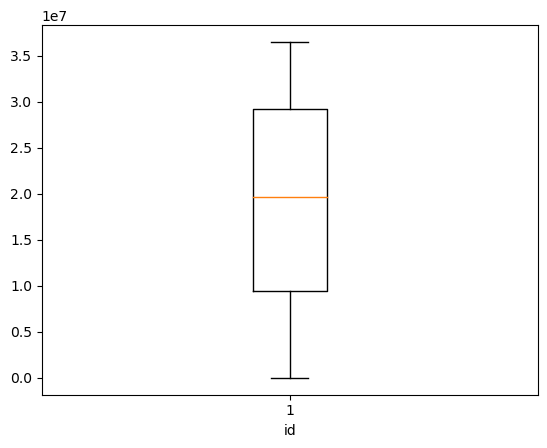

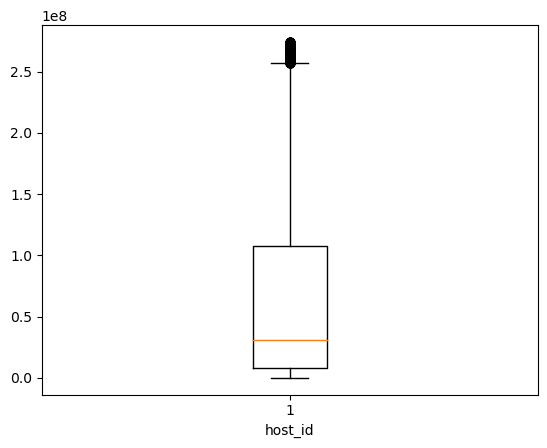

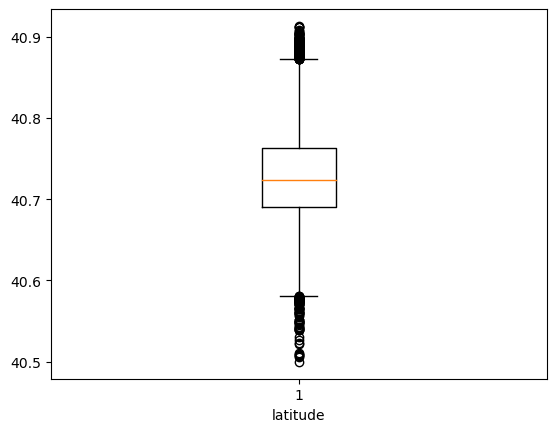

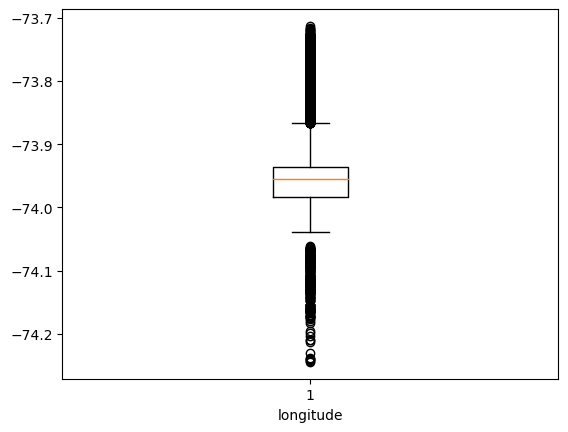

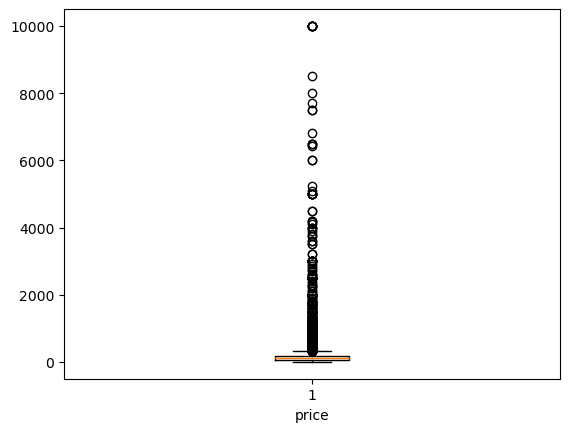

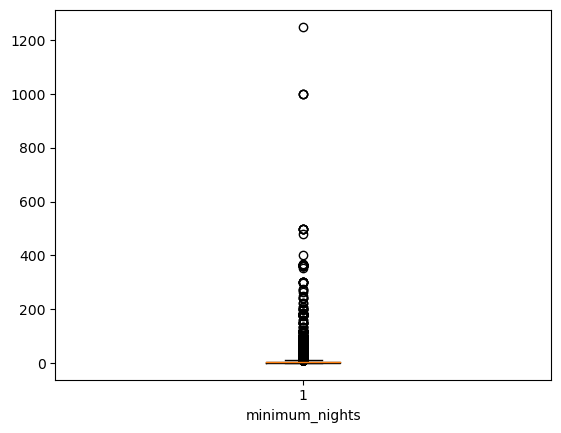

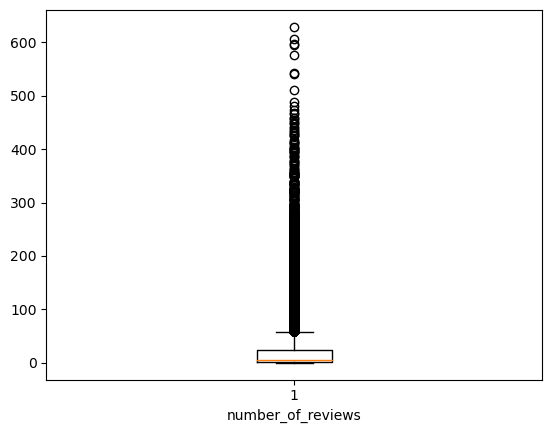

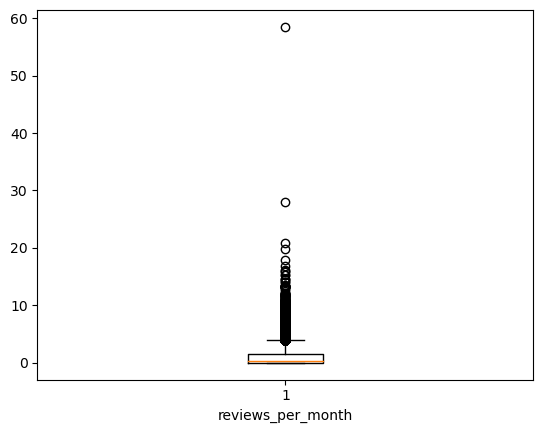

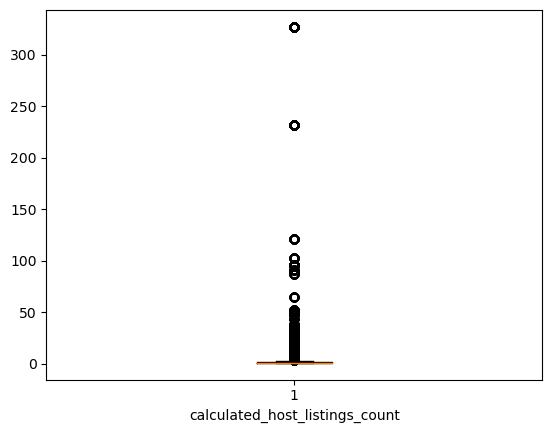

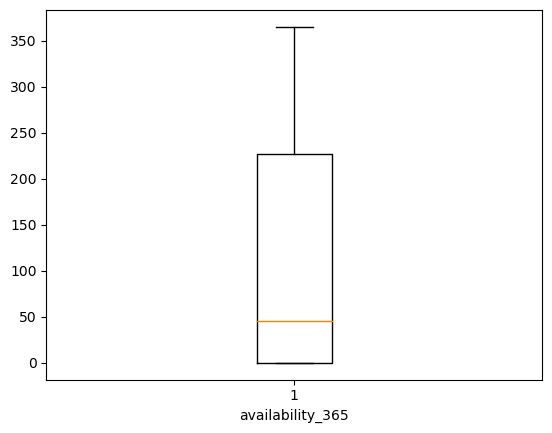

In [16]:
# outliers detection
for i in df.columns:
  if(df[i].dtypes == "int64" or df[i].dtypes == "float64"):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

### Insights

After detecting the outliers, we can see there are outliers in Price, minimum_nights, reviews_per_month, calculated_host_listings_count.
But here we will keep those outliers because price may vary on various factors, reviews_per_month can be sometimes 0 or more than 100 or just 10 to 50, calculated_host_listings_count can also vary on the basis of the season and other impacting factors. 

## Data Visualization

**1. Analysing the type of rooms people preferring the most.**

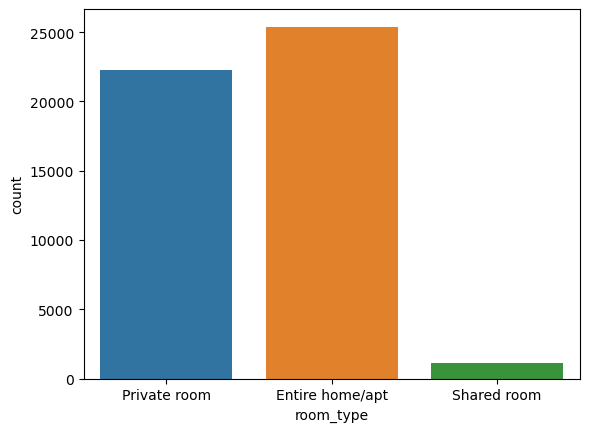

In [17]:
sns.countplot(x = 'room_type', data = df)
plt.show()

In [18]:
df['room_type'].value_counts()

room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: count, dtype: int64

### Insights

1. Entire home/apt is the most preferred room type among the customers about 25393.
2. Private room is the second most about 22306.

**2. Most popular geographically**

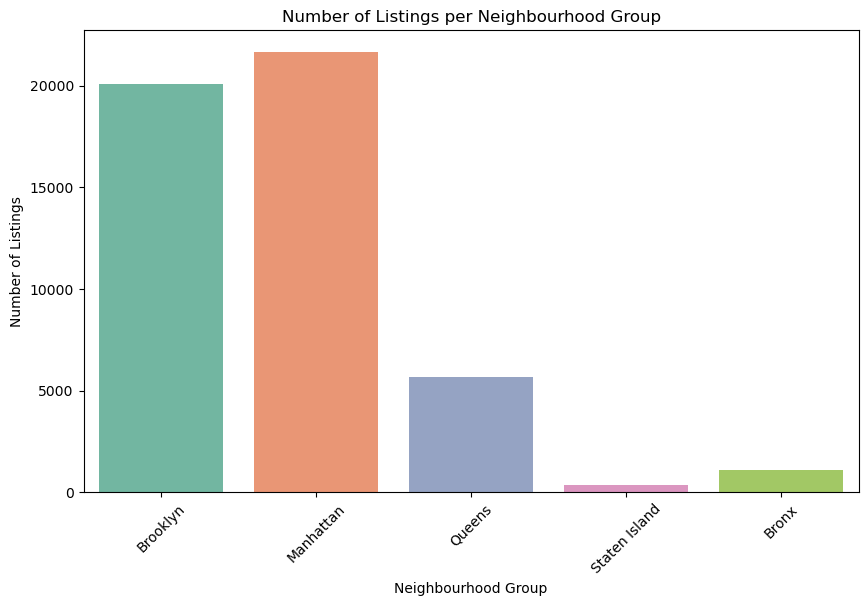

In [19]:
# Plot the count of listings in each neighbourhood group

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', palette='Set2')
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


### Insights

Here, we found that Manhattan has the most number of listings geographically in comparison to other neighbourhood groups.

**Distribution of Price within each category of neighbourhood_group and room_type**

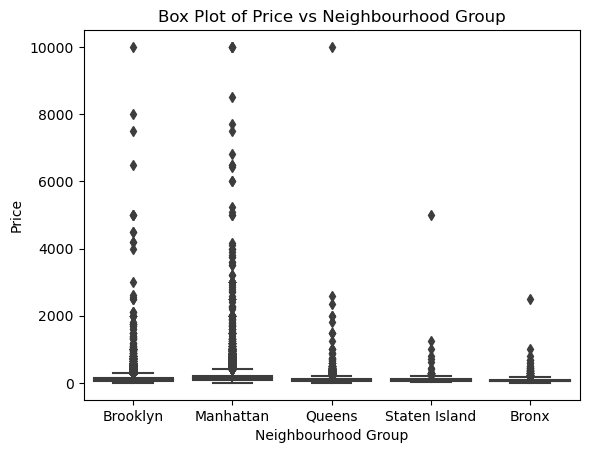

In [20]:
#Box Plot of Price vs. Neighbourhood Group

sns.boxplot(x='neighbourhood_group', y='price', data=df)

plt.title('Box Plot of Price vs Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

plt.show()


### Insights
Here, we can see the neighbourhood group "Manhattan" & "Brooklyn" having higher prices whereas "Bronx" have lower prices of listing.

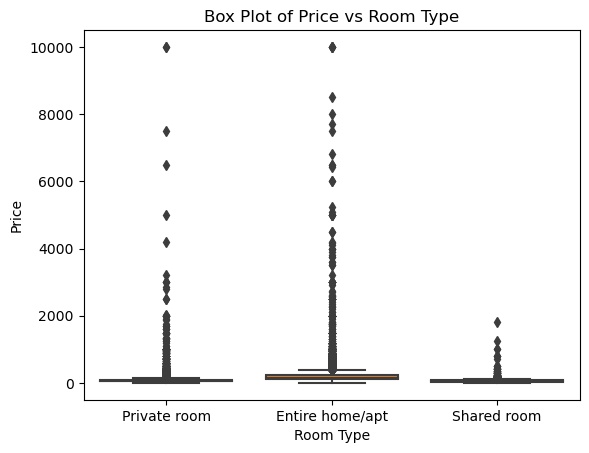

In [21]:
# Box plot for Price vs Room Type
sns.boxplot(x='room_type', y='price', data=df)

plt.title('Box Plot of Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

plt.show()


### Insights
In this visualization we can clearly see that the prices of Private room & Entire home/apt are higher whereas the Shared rooms are cheaper.

**Now checking the coreraltion of all the numerical data with each other to see how they change in relation to each other.**

In [22]:
numData = df.select_dtypes(include=[np.number])
numData

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,0.00,2,9
48891,36485057,6570630,40.70184,-73.93317,40,4,0,0.00,2,36
48892,36485431,23492952,40.81475,-73.94867,115,10,0,0.00,1,27
48893,36485609,30985759,40.75751,-73.99112,55,1,0,0.00,6,2


In [23]:
#correlation matrix to check the relationship b/w the columns
corrMat = numData.corr()
corrMat

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588221,-0.003116,0.091076,0.010564,-0.012038,-0.320020,0.180095,0.133224,0.085616
host_id,0.588221,1.000000,0.020193,0.127198,0.015328,-0.017027,-0.140273,0.209644,0.154954,0.203743
latitude,-0.003116,0.020193,1.000000,0.084819,0.033944,0.025893,-0.015198,-0.018702,0.019548,-0.010775
longitude,0.091076,0.127198,0.084819,1.000000,-0.149954,-0.062893,0.059151,0.138759,-0.114746,0.082754
price,0.010564,0.015328,0.033944,-0.149954,1.000000,0.042804,-0.047949,-0.050586,0.057460,0.081817
minimum_nights,-0.012038,-0.017027,0.025893,-0.062893,0.042804,1.000000,-0.081610,-0.127378,0.131313,0.145953
number_of_reviews,-0.320020,-0.140273,-0.015198,0.059151,-0.047949,-0.081610,1.000000,0.589221,-0.072408,0.171855
reviews_per_month,0.180095,0.209644,-0.018702,0.138759,-0.050586,-0.127378,0.589221,1.000000,-0.047366,0.163751
calculated_host_listings_count,0.133224,0.154954,0.019548,-0.114746,0.057460,0.131313,-0.072408,-0.047366,1.000000,0.225784
availability_365,0.085616,0.203743,-0.010775,0.082754,0.081817,0.145953,0.171855,0.163751,0.225784,1.000000


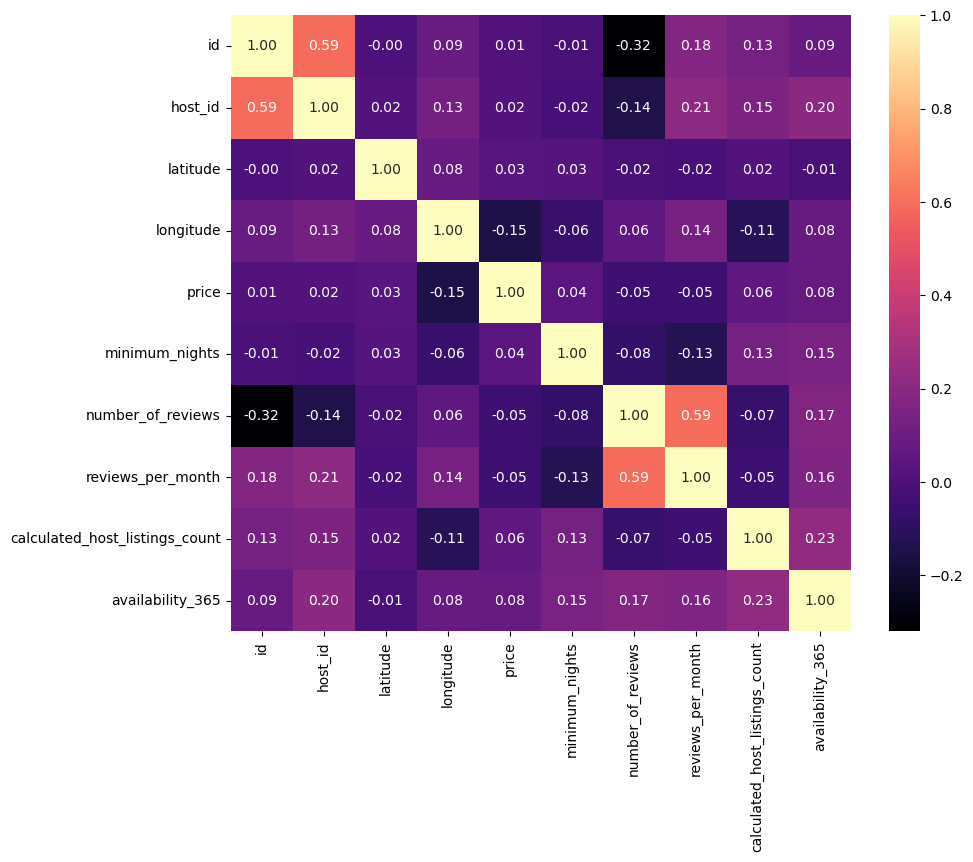

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(corrMat,annot=True, fmt='.2f', cmap='magma')
plt.show()

### Insights

1. Availability of the properties have strong correlation with Number of listings associated with the host and weak correlation with longitute(geographical location).
2. Reviews per month have strong correlation with the availability and weak correlation with price.
3. Minimum nights have strong correlation with the availability and weak correlation with longitude.
4. Price have strong correlation with availability and weak correlation with longitude.

### Observation
 
**The Availability of the property is the most impacting factor we found through the analysis. It's affecting the price, listing, reviews, adn the number of nights.**

## Availability Analysis

In [29]:
# Average availability by neighbourhood
availability_by_neighbourhood = df.groupby('neighbourhood_group')['availability_365'].mean()

print(availability_by_neighbourhood)

neighbourhood_group
Bronx            165.704316
Brooklyn         100.235801
Manhattan        112.013445
Queens           144.487288
Staten Island    199.678284
Name: availability_365, dtype: float64


In [27]:
# Average availability by room type
availability_by_room_type = df.groupby('room_type')['availability_365'].mean()

print(availability_by_room_type)

room_type
Entire home/apt    111.914110
Private room       111.264279
Shared room        161.825712
Name: availability_365, dtype: float64


### Insights

Here in the analysis of Average availability by neighbourhood, we can see the availability of the properties is higher in Staten Island.
whereas, in the analysis of Average availability by room type, we can see the Shared room's availability is higher than the other properties.

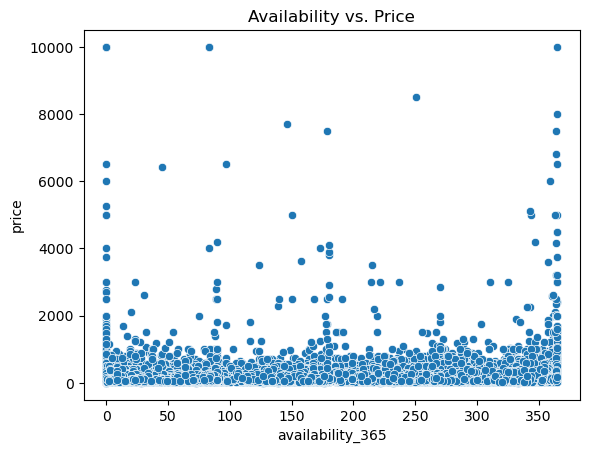

In [28]:
# Scatter plot of availability vs. price
sns.scatterplot(data=df, x='availability_365', y='price')
plt.title('Availability vs. Price')
plt.show()

### Insights

1. Properties with high availability (close to 365 days) are more common in the lower price ranges. This might indicate that budget-friendly properties are consistently listed year-round.
2. Many expensive properties tend to have limited availability (e.g., below 100 days).

In [30]:
# Group availability into categories and analyze reviews
df['availability_category'] = pd.cut(df['availability_365'], bins=[0, 120, 240, 365], labels=['Low', 'Medium', 'High'])
reviews_by_availability = df.groupby('availability_category')['number_of_reviews'].mean()

print(reviews_by_availability)


availability_category
Low       28.772229
Medium    37.562154
High      32.008787
Name: number_of_reviews, dtype: float64


### Insights

1. Properties with medium availability (e.g., 120–240 days/year) tend to receive the most reviews.
2. Listings available almost year-round receive fewer reviews on average than those with medium availability.
3. Properties with low availability tend to have fewer reviews, likely because they are booked less often (due to limited availability).

# Overall Conclusion of Airbnb Data Analysis:

This analysis of Airbnb data uncovered several key insights regarding listings, pricing, availability, and guest preferences. Here's a summary of the main findings:

**Room Type Preferences:**

- "Entire home/apt" is the most popular room type, followed by "Private room." 
- "Shared room" is the least preferred option.

**Geographical Popularity:**

- Manhattan has the highest number of Airbnb listings, indicating it's a popular area for both hosts and guests.
- Brooklyn is the second most popular region.
- Staten Island has the lowest number of listings.

**Price Variations:**

- Manhattan and Brooklyn listings generally have higher prices.
- The Bronx tends to have lower-priced listings.
- "Entire home/apt" and "Private room" are usually more expensive than "Shared room."

**Data Quality:**

- The data cleaning process was effective at handling null values, by filling the review_per_month with 0, and dropping the rows containing the null values in the name and host_name columns.
- The last_review column was dropped because it had too many null values.
- There were a lot of outliers in certain columns, but they were kept due to the context of the problem.

**Correlation Insights:**

- Availability of listings is a crucial factor.
- High availability is linked to lower prices, while expensive properties often have limited availability.
- Listings with medium availability (120-240 days per year) tend to have the most reviews.
- The availability was shown to be correlated with the price, listings, reviews, and number of nights.

**Availability Trends:**

- Staten Island has the highest average listing availability.
- "Shared room" has the highest average availability compared to other room types.
- Most of the high availability listings are in the lower price ranges.

**Reviews and Availability:**

- Listings with medium availability get the most reviews, possibly because they strike a balance between being available and not being over-saturated.
- Listings with low availability get few reviews, which may be due to how little they are booked.
- Listings with high availability get few reviews, which may be due to over-saturation.

### Overall:

The Airbnb market in the analyzed area is diverse, with significant variations in room types, pricing, and availability across different neighborhood groups.
Availability is a key driver, influencing both price and the number of reviews.
Manhattan and Brooklyn are the most sought-after areas, suggesting high demand in these locations.
The analysis shows the important relationship between availability, pricing and reviews.



**Analysis by: Ajay Singh Chandel**

**Email: asinghchandel082@gmail.com**